In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model, model_selection

In [2]:
data, target = datasets.load_diabetes(return_X_y=True, as_frame=True)
column = np.array(data.columns)
print(data)
data = data.values
print(data.shape)

          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
..        ...       ...       ...       ...       ...       ...       ...   
437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
439  0.041708  0.050680 -0.015906  0.017282 -0.037344 -0.013840 -0.024993   
440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
441 -0.045472 -0.044642 -0.073030 -0.081414  0.083740  0.027809  0.173816   

           s4        s5        s6  
0   -0.002592  0.019908 -0.017646  
1  

target为患糖尿病一年后的定量测量指标

In [3]:
X = data[:, 2, np.newaxis]  # 筛选第二列为特征
X.shape

(442, 1)

In [4]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, target, test_size = 0.3)

In [5]:
model = linear_model.LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

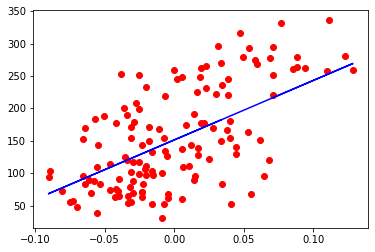

In [6]:
plt.plot(X_test, y_pred, color='b')
plt.scatter(X_test, y_test, color='r')
plt.show()

### Assignment 2-1

In [7]:
data, target = datasets.load_linnerud(return_X_y=True, as_frame=True)
column = np.array(data.columns)
print(data)
data = data.values
print(data.shape)

    Chins  Situps  Jumps
0     5.0   162.0   60.0
1     2.0   110.0   60.0
2    12.0   101.0  101.0
3    12.0   105.0   37.0
4    13.0   155.0   58.0
5     4.0   101.0   42.0
6     8.0   101.0   38.0
7     6.0   125.0   40.0
8    15.0   200.0   40.0
9    17.0   251.0  250.0
10   17.0   120.0   38.0
11   13.0   210.0  115.0
12   14.0   215.0  105.0
13    1.0    50.0   50.0
14    6.0    70.0   31.0
15   12.0   210.0  120.0
16    4.0    60.0   25.0
17   11.0   230.0   80.0
18   15.0   225.0   73.0
19    2.0   110.0   43.0
(20, 3)


In [8]:
print(target.shape)
print(target)

(20, 3)
    Weight  Waist  Pulse
0    191.0   36.0   50.0
1    189.0   37.0   52.0
2    193.0   38.0   58.0
3    162.0   35.0   62.0
4    189.0   35.0   46.0
5    182.0   36.0   56.0
6    211.0   38.0   56.0
7    167.0   34.0   60.0
8    176.0   31.0   74.0
9    154.0   33.0   56.0
10   169.0   34.0   50.0
11   166.0   33.0   52.0
12   154.0   34.0   64.0
13   247.0   46.0   50.0
14   193.0   36.0   46.0
15   202.0   37.0   62.0
16   176.0   37.0   54.0
17   157.0   32.0   52.0
18   156.0   33.0   54.0
19   138.0   33.0   68.0


In [9]:
print('系数矩阵:\n',linear_model.LinearRegression().fit(data,target).coef_)

系数矩阵:
 [[-0.47502636 -0.21771647  0.09308837]
 [-0.13687023 -0.04033662  0.0279736 ]
 [ 0.00107079  0.04202941 -0.02946117]]


### 2.2 North American pumpkin prices 🎃

In [10]:
import pandas as pd

In [11]:
pumpkins = pd.read_csv('US-pumpkins.csv')
pumpkins.isnull().sum()

City Name             0
Type               1712
Package               0
Variety               5
Sub Variety        1461
Grade              1757
Date                  0
Low Price             0
High Price            0
Mostly Low          103
Mostly High         103
Origin                3
Origin District    1626
Item Size           279
Color               616
Environment        1757
Unit of Sale       1595
Quality            1757
Condition          1757
Appearance         1757
Storage            1757
Crop               1757
Repack                0
Trans Mode         1757
Unnamed: 24        1757
Unnamed: 25        1654
dtype: int64

In [12]:
new_columes = ['Package', 'Month', 'Low Price', 'High Price', 'Date']
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columes], axis=1)
price = (pumpkins['Low Price'] + pumpkins['High Price'])/2
type(price)
pumpkins['Month'] = pd.DatetimeIndex(pumpkins['Date']).month  # 新增一列月份数据
pumpkins['Price'] = price  # 新增均价数据

In [13]:
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]
pumpkins.loc[pumpkins['Package'].str.contains('1 1/9'), 'Price'] = price/(1 + 1/9)
pumpkins.loc[pumpkins['Package'].str.contains('1/2'), 'Price'] = price/(1/2)

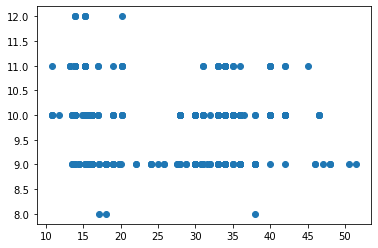

In [14]:
price = pumpkins.Price
month = pumpkins.Month
plt.scatter(price, month)
plt.show()

Text(0, 0.5, 'Pumpkin Price')

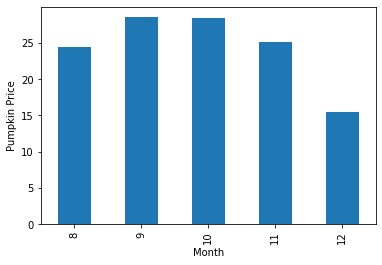

In [15]:
pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")